### Imported Libraries

In [1]:
import numpy as np #used for working with arrays
import pandas as pd #used for importing multiple file 
from os import listdir #used to get the list of all files and directories in the specified directory
from numpy.linalg import eigh #used for calculating eigen values and vectors of complex data
import matplotlib.pyplot as plt #used for data visualization and graphical plotting
from PIL import Image as PImage #used for opening, rotating and displaying an image
from sklearn.metrics import accuracy_score #used to calculate the accuracy of either the faction or count of correct prediction 
from sklearn.neighbors import KNeighborsClassifier #used for implementing learning based on the k nearest neighbors

In [2]:
plt.rcParams["figure.figsize"] = (6, 6) #for resizing the plot to be more clearer

### Initializing of Data

In [3]:
def loadLabels (loadedImages):
    DM = np.arange(400*10304).reshape(400,10304)
    labels = []
    l = 0
    
    #for appending data matrix and labels
    for i in range(0,400) :
        #for every ten photos increment the number of labels
        if(i % 10 == 0):
            l+=1
        DM[i] = np.array(loadedImages[i]).flatten() #flatten() used to convert the matrix into vector
        labels.append(l) 
        
    return labels, DM

In [4]:
def loadImages(path):
    directory = listdir(path)
    Images = []
    
    # return array of images
    for dirs in directory :
        #loading images from each folder
        imgList = listdir(path+'/'+dirs)
        for image in imgList:
            #opening images one by one and then appending them
            img = PImage.open(path +'/'+dirs+'/'+ image)
            Images.append(img)
    
    labels, DM = loadLabels(Images)
    
    return Images, labels, DM

#### Another way

In [5]:
# def load_Images(folder, y):
#     images = []
#     labels = []
#     pics = os.listdir(folder)
    
#     for pic in pics:
#         img = cv2.imread(os.path.join(folder,pic))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # transform to grayscale
        
#         if img is not None:
#             images.append(img)
#             labels.append(y)
            
#     return images, labels

In [6]:
#loading images from folder
# def load_folder(folder):
#     images = []
#     labels = []
#     dirs = os.listdir(folder)
    
#     for directory in dirs:
#         y = directory[1:]
#         path = os.path.join(folder, directory)
#         i, l = load_Images(path, y)
#         images = images + i 
#         labels = labels + l
        
#     images = np.array(images) 
#     images = images.reshape(images.shape[0],images.shape[1] * images.shape[2])
#     labels = np.array(labels)

#     return images, labels

### Splitting

In [7]:
def splitting (images, labels, DM):
    X_train = np.arange(200*10304).reshape(200,10304)
    X_test = np.arange(200*10304).reshape(200,10304)
    y_train, y_test = [], []
    even, odd = 0, 0
    
    #appending training and test data
    for i in range(0,400):
        if(i % 2 == 0):
            X_test[even] = DM[i]
            #X_test[even] = images[i]
            y_test.append(labels[i])
            even+=1
        else:
            X_train[odd] = DM[i]
            #X_train[odd] = images[i]
            y_train.append(labels[i])
            odd+=1
            
    return X_train, X_test, y_train, y_test

### Classifier Tuning using KNN

In [8]:
def KNN (X_train, X_test, y_train, y_test):
    accuracy = []
    n = [1, 3, 5, 7] # no. of neighbors
    
    for i in range(len(n)):
        print("At Neighbors: " + str(n[i])+ "\n")
        knn = KNeighborsClassifier(n_neighbors = n[i])
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy.append(accuracy_score(y_pred,y_test)) 
        print("Accuracy: " + str(accuracy[i])+ "\n")
        
    #plotting accuracy of knn vs no of neighbors
    plt.xlabel('N-Neighbors');
    plt.ylabel('Accuracy');
    plt.plot(n, accuracy)
    plt.show()

### PCA

In [9]:
#computing dimentionality of alpha
def FTV (eig_Val,r):
    total_Var = np.sum(eig_Val)
    
    Var_Fr,Dim_no,eig_Val_Sum=0,1,0
    
    while(Var_Fr < r):
        eig_Val_Sum += eig_Val[Dim_no-1]
        Var_Fr = eig_Val_Sum/total_Var
        Dim_no+=1
        
    return Dim_no

In [10]:
def PCA (X_train, X_test, y_train, y_test ,alpha):
    #computing mean
    mean_train = np.mean(X_train, axis = 0)
    mean_test = np.mean(X_test, axis = 0)
    
    #centralization of data
    Z_train = X_train - mean_train
    Z_test = X_test - mean_test
    
    #covariance matrix
    Cov = np.cov(Z_train, rowvar = 0 , bias = 1)
    
    eig_Val, eig_Vec = np.linalg.eigh(Cov)
    #sort them in decending order
    eig_Val_sorted=np.flip(eig_Val,axis=0)
    eig_Vec_sorted=np.flip(eig_Vec,axis=1)
    
    for a in alpha:
        Dim_A = FTV (eig_Val_sorted, a)
        #Computing the projection matrix
        #Feature Vector
        U = eig_Vec_sorted[:,0:Dim_A]
        #Computing the reduced train and test set
        #recast data along pca axes
        red_train = U.T @ Z_train.T
        red_test = U.T @ Z_test.T
        print("At Alpha: " + str(a) + "\n")
        print("At r = " + str(Dim_A) + "\n")
        #computting th K-NearestNeighbour
        KNN (red_train.T, red_test.T, y_train, y_test)

### Final Data Analysis

In [11]:
data = 'D:\\.FCDS\\pattern\\faces'
images, labels, data_matrix = loadImages(data)
X_train, X_test, y_train, y_test = splitting (images, labels, data_matrix)

At Alpha: 0.8

At r = 37

At Neighbors: 1

Accuracy: 0.94

At Neighbors: 3

Accuracy: 0.83

At Neighbors: 5

Accuracy: 0.81

At Neighbors: 7

Accuracy: 0.77



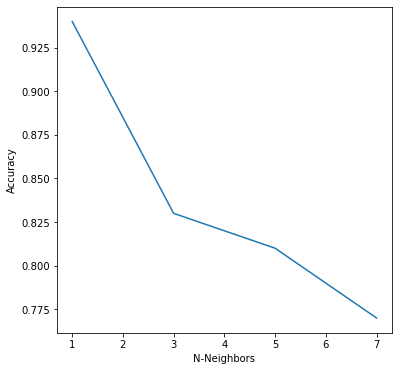

At Alpha: 0.85

At r = 53

At Neighbors: 1

Accuracy: 0.945

At Neighbors: 3

Accuracy: 0.865

At Neighbors: 5

Accuracy: 0.795

At Neighbors: 7

Accuracy: 0.775



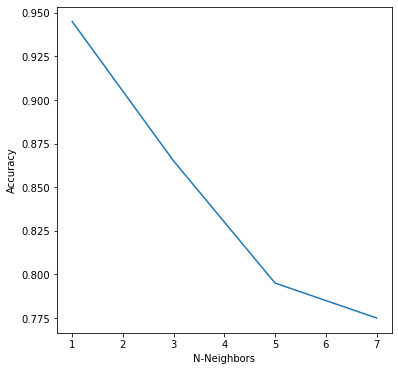

At Alpha: 0.9

At r = 77

At Neighbors: 1

Accuracy: 0.935

At Neighbors: 3

Accuracy: 0.875

At Neighbors: 5

Accuracy: 0.805

At Neighbors: 7

Accuracy: 0.765



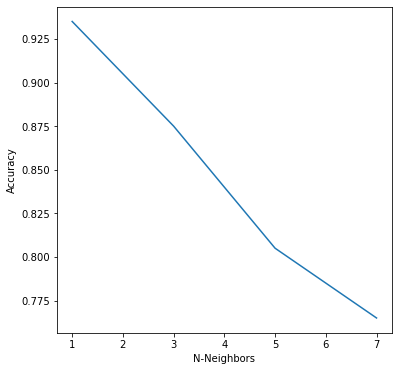

At Alpha: 0.95

At r = 118

At Neighbors: 1

Accuracy: 0.935

At Neighbors: 3

Accuracy: 0.87

At Neighbors: 5

Accuracy: 0.785

At Neighbors: 7

Accuracy: 0.775



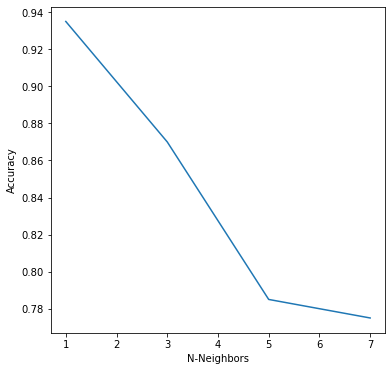

In [12]:
a = [0.8, 0.85, 0.9, 0.95]
PCA (X_train, X_test, y_train, y_test, a)

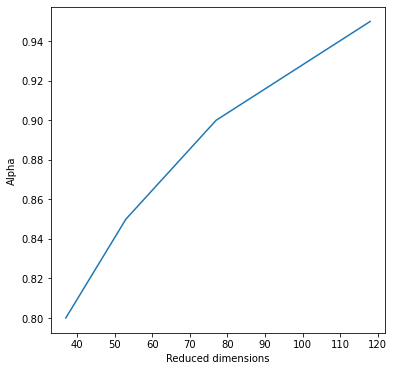

In [13]:
#plotting Reduced dimensions vs alpha
r = [37,53,77,118]
plt.xlabel('Reduced dimensions');
plt.ylabel('Alpha');
plt.plot(r, a)
plt.show()

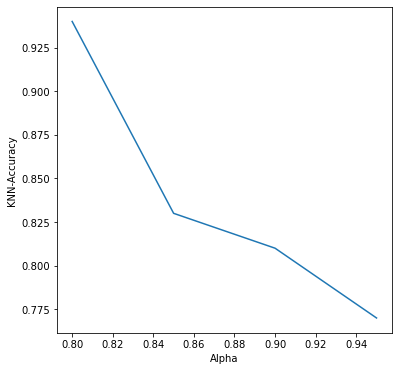

In [14]:
#plotting accuracy of knn vs alpha
accuracy1 = [0.94,0.83,0.81,0.77]
plt.xlabel('Alpha');
plt.ylabel('KNN-Accuracy');
plt.plot(a, accuracy1)
plt.show()

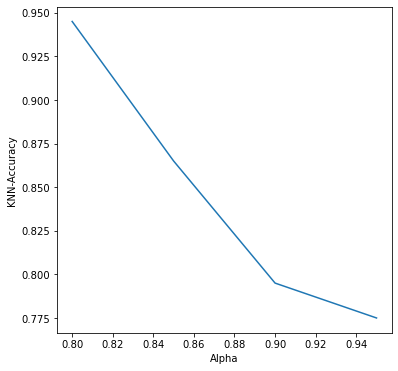

In [15]:
#plotting accuracy of knn vs alpha
accuracy2 = [0.945,0.865,0.795,0.775]
plt.xlabel('Alpha');
plt.ylabel('KNN-Accuracy');
plt.plot(a, accuracy2)
plt.show()

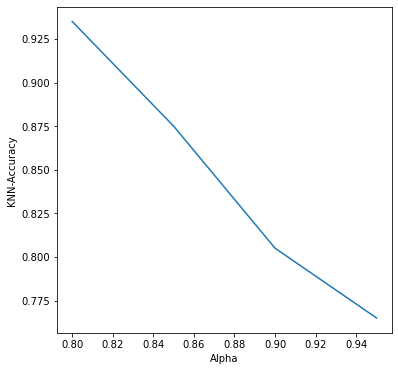

In [16]:
#plotting accuracy of knn vs alpha
accuracy3 = [0.935,0.875,0.805,0.765]
plt.xlabel('Alpha');
plt.ylabel('KNN-Accuracy');
plt.plot(a, accuracy3)
plt.show()

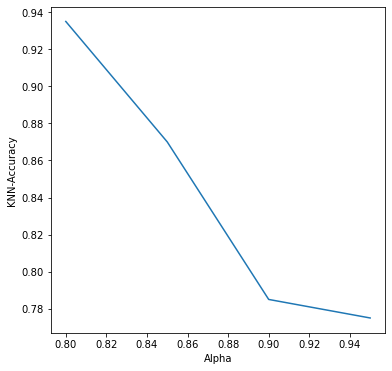

In [17]:
#plotting accuracy of knn vs alpha
accuracy4 = [0.935,0.87,0.785,0.775]
plt.xlabel('Alpha');
plt.ylabel('KNN-Accuracy');
plt.plot(a, accuracy4)
plt.show()